In [2]:
#!pip install fedot

In [3]:
import os
os.environ["MKL_NUM_THREADS"] = "4"
os.environ["NUMEXPR_NUM_THREADS"] = "4"
os.environ["OMP_NUM_THREADS"] = "4"

import torch
torch.set_num_threads(4)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging
logging.raiseExceptions = False

import fedot
from fedot.api.main import Fedot
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import TsForecastingParams, Task, TaskTypesEnum
import inspect

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
ts_tabular =pd.read_csv('ts study 1.txt')
ts_real_temp = ts_tabular[ts_tabular['label']=='temp'].drop('label',axis=1)['value'].to_numpy()

In [5]:
def s1(n,noise = 3,sign=1):
    def f1(x):
        return 5*np.sin(x/20)+0.1*x-2*np.sqrt(x)
    trend = f1(np.array(range(n)))
    noise = np.random.normal(loc = 0, scale = noise,size = n)
    ans = {'ts':(trend+noise)*sign, 'trend' : trend*sign}
    return ans
def s2(length, periods = 10,noise = 0.3,sign=1 ):

    sinusoidal_data = np.linspace(-periods * np.pi, periods * np.pi, length)
    sinusoidal_data = np.sin(sinusoidal_data)
    cos_1_data = np.linspace(-periods * np.pi/2, periods/2 * np.pi/2, int(length/2))
    cos_1_data = np.cos(cos_1_data) 
    cos_2_data = np.linspace(periods/2 * np.pi/2, periods * np.pi/2, int(length/2))
    cos_2_data = np.cos(cos_2_data)   
    cosine_data = np.hstack((cos_1_data, cos_2_data))
    
    random_noise = np.random.normal(loc=0.0, scale=noise, size=length)
    synthetic_data = sinusoidal_data + cosine_data + random_noise
    ans = {'ts':synthetic_data*sign, 'trend': (sinusoidal_data + cosine_data)*sign}
    return ans
def s3(n,noise = 10,sign = 1):
    r = np.array(range(n))
    trend = (r-r/5*np.sin(r/2)+r/2*np.sin(r/20))/10
    noise = np.random.normal(loc=0,scale = noise,size = n)
    ans = {'ts':(trend+noise)*sign, 'trend': trend*sign}
    return ans
def s4(n,noise = 1,sign =1):
    array = np.array(range(n))
    trend = array/5+np.power(array,0.5)*np.sin(np.pi/12*array)
    noise = np.random.normal(loc = 0,scale = noise, size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign, 'trend' : trend*sign}
    return ans

def s5(n,noise = 1,sign=1):
    r= np.arange(n)
    trend = r*1
    noise = np.random.normal(loc=0,scale = noise,size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign,'trend':trend*sign}
    return ans

def s6(n,noise = 1, sign =1):
    r = np.arange(n)
    trend = 2*np.sin(2*r)+np.cos(r)
    noise = np.random.normal(loc = 0,scale  = noise,size = n)
    ts = trend+noise
    ans = {'ts':ts,'trend':trend}
    return ans

In [10]:
horizon = 25
validation_blocks = 2
task = Task(TaskTypesEnum.ts_forecasting,  TsForecastingParams(forecast_length=horizon))
start = 0
end = 1000
series = 5

if series == 'traffic':
    init_series = ts_real_temp
    ts = init_series[start:end]
    trend = None
    ts_test = init_series[end:end+horizon]
    trend_test = None
    idx = np.array(range(len(np.array(ts))))

if series ==1:
    noise = 0.5
    init_series = s1(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)

    
if series ==2:
    noise = 0.5
    init_series = s2(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    
if series ==3:
    noise = 0.5
    init_series = s3(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    
if series ==4:
    noise = 0.5
    init_series = s4(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
  
if series ==5:
    noise = 1
    init_series = s5(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    

if series ==6:
    noise = 0.5
    init_series = s6(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    

train_data, test_data = train_test_data_setup(train_input, validation_blocks=2)

# init model for the time series forecasting
model = Fedot(problem='ts_forecasting',
                  safe_mode = True,
                  task_params=task.task_params,
                  timeout=3,
                  n_jobs=-1,
                  cv_folds=2, 
                  validation_blocks=2, 
                  preset='stable',
                  with_tuning = False,
                  max_depth = 5,
                  num_of_generations  =3 ,
                  logging_level = 10,
                 show_progress =True)

In [ ]:
inspect.getmembers(model)

[('__class__', fedot.api.main.Fedot),
 ('__delattr__',
  <method-wrapper '__delattr__' of Fedot object at 0x7f64b5cef150>),
 ('__dict__',
  {'metrics': <fedot.api.api_utils.metrics.ApiMetrics at 0x7f64b5c14910>,
   'api_composer': <fedot.api.api_utils.api_composer.ApiComposer at 0x7f64b5c14150>,
   'params': <fedot.api.api_utils.params.ApiParams at 0x7f64b5c14f10>,
   'data_processor': <fedot.api.api_utils.api_data.ApiDataProcessor at 0x7f64b8e25ad0>,
   'data_analyser': <fedot.api.api_utils.api_data_analyser.DataAnalyser at 0x7f64b5d3df50>,
   'target': None,
   'prediction': None,
   'train_data': None,
   'test_data': None,
   'current_pipeline': None,
   'best_models': (),
   'history': None}),
 ('__dir__', <function Fedot.__dir__()>),
 ('__doc__',
  "Main class for FEDOT API.\n\n    Facade for ApiDataProcessor, ApiComposer, ApiMetrics, ApiInitialAssumptions.\n\n    Args:\n        problem: the name of modelling problem to solve\n\n            .. details:: possible ``problem`` optio

INFO:root:AssumptionsHandler - Initial pipeline fitting started


2022-11-22 16:00:07,216 - AssumptionsHandler - Initial pipeline fitting started


DEBUG:root:SecondaryNode - Trying to fit secondary node with operation: ridge


2022-11-22 16:00:07,227 - SecondaryNode - Trying to fit secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 16:00:07,235 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Trying to fit secondary node with operation: ridge


2022-11-22 16:00:07,242 - SecondaryNode - Trying to fit secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 16:00:07,249 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Trying to fit primary node with operation: lagged


2022-11-22 16:00:07,253 - PrimaryNode - Trying to fit primary node with operation: lagged


DEBUG:root:PrimaryNode - Trying to fit primary node with operation: glm


2022-11-22 16:00:07,378 - PrimaryNode - Trying to fit primary node with operation: glm


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 16:00:07,509 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 16:00:07,515 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 16:00:07,518 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 16:00:07,522 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Predict in primary node by operation: lagged


2022-11-22 16:00:07,527 - PrimaryNode - Predict in primary node by operation: lagged


DEBUG:root:PrimaryNode - Predict in primary node by operation: glm


2022-11-22 16:00:07,536 - PrimaryNode - Predict in primary node by operation: glm


INFO:root:AssumptionsHandler - Initial pipeline was fitted successfully


2022-11-22 16:00:07,546 - AssumptionsHandler - Initial pipeline was fitted successfully


CRITICAL:root:ApiComposer - Initial pipeline was fitted in 0.3 sec.


2022-11-22 16:00:07,552 - ApiComposer - Initial pipeline was fitted in 0.3 sec.


CRITICAL:root:ApiComposer - AutoML configured. Parameters tuning: False Time limit: 3 min Set of candidate models: ['smoothing', 'gbr', 'linear', 'sgdr', 'normalization', 'lasso', 'cut', 'fast_ica', 'ridge', 'adareg', 'scaling', 'gaussian_filter', 'poly_features', 'diff_filter', 'ar', 'rfr', 'treg', 'lagged', 'ts_naive_average', 'locf', 'ransac_non_lin_reg', 'glm', 'dtreg', 'polyfit', 'ets', 'isolation_forest_reg', 'ransac_lin_reg', 'sparse_lagged', 'lgbmreg', 'clstm', 'pca']


2022-11-22 16:00:07,578 - ApiComposer - AutoML configured. Parameters tuning: False Time limit: 3 min Set of candidate models: ['smoothing', 'gbr', 'linear', 'sgdr', 'normalization', 'lasso', 'cut', 'fast_ica', 'ridge', 'adareg', 'scaling', 'gaussian_filter', 'poly_features', 'diff_filter', 'ar', 'rfr', 'treg', 'lagged', 'ts_naive_average', 'locf', 'ransac_non_lin_reg', 'glm', 'dtreg', 'polyfit', 'ets', 'isolation_forest_reg', 'ransac_lin_reg', 'sparse_lagged', 'lgbmreg', 'clstm', 'pca']


CRITICAL:root:ApiComposer - Pipeline composition started.


2022-11-22 16:00:07,608 - ApiComposer - Pipeline composition started.


INFO:root:DataSourceSplitter - K-folds cross validation is applied.


2022-11-22 16:00:07,615 - DataSourceSplitter - K-folds cross validation is applied.


Generations:  33%|███▎      | 1/3 [00:00<?, ?gen/s]INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-11-22 16:00:07,622 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 1


2022-11-22 16:00:16,275 - EvoGraphOptimizer - Generation num: 1


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 4.47968263962997, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


2022-11-22 16:00:16,282 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 4.47968263962997, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


INFO:root:EvoGraphOptimizer - no improvements for 0 iterations


2022-11-22 16:00:16,285 - EvoGraphOptimizer - no improvements for 0 iterations


INFO:root:EvoGraphOptimizer - spent time: 0.1 min


2022-11-22 16:00:16,288 - EvoGraphOptimizer - spent time: 0.1 min


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-11-22 16:00:18,175 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 2


2022-11-22 16:00:45,354 - EvoGraphOptimizer - Generation num: 2


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 2.99353864116682, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


2022-11-22 16:00:45,360 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 2.99353864116682, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


INFO:root:EvoGraphOptimizer - no improvements for 0 iterations


2022-11-22 16:00:45,364 - EvoGraphOptimizer - no improvements for 0 iterations


INFO:root:EvoGraphOptimizer - spent time: 0.6 min


2022-11-22 16:00:45,367 - EvoGraphOptimizer - spent time: 0.6 min


INFO:root:EvoGraphOptimizer - Next population size: 34; max graph depth: 5


2022-11-22 16:00:45,371 - EvoGraphOptimizer - Next population size: 34; max graph depth: 5


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-11-22 16:00:46,367 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 3


2022-11-22 16:01:04,551 - EvoGraphOptimizer - Generation num: 3


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 2.962286770682258, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


2022-11-22 16:01:04,566 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 2.962286770682258, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


INFO:root:EvoGraphOptimizer - no improvements for 0 iterations


2022-11-22 16:01:04,573 - EvoGraphOptimizer - no improvements for 0 iterations


INFO:root:EvoGraphOptimizer - spent time: 0.9 min


2022-11-22 16:01:04,576 - EvoGraphOptimizer - spent time: 0.9 min


INFO:root:EvoGraphOptimizer - Next population size: 55; max graph depth: 5


2022-11-22 16:01:04,580 - EvoGraphOptimizer - Next population size: 55; max graph depth: 5


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-11-22 16:01:06,031 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 4


2022-11-22 16:02:34,865 - EvoGraphOptimizer - Generation num: 4


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 2.962286770682258, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


2022-11-22 16:02:34,871 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 2.962286770682258, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


INFO:root:EvoGraphOptimizer - no improvements for 1 iterations


2022-11-22 16:02:34,876 - EvoGraphOptimizer - no improvements for 1 iterations


INFO:root:EvoGraphOptimizer - spent time: 2.5 min


2022-11-22 16:02:34,879 - EvoGraphOptimizer - spent time: 2.5 min


CRITICAL:root:GroupedCondition - Optimisation stopped: Max number of generations reached


2022-11-22 16:02:34,882 - GroupedCondition - Optimisation stopped: Max number of generations reached


Generations:  33%|███▎      | 1/3 [02:27<?, ?gen/s]
INFO:root:OptimisationTimer - Composition time: 2.454 min


2022-11-22 16:02:34,887 - OptimisationTimer - Composition time: 2.454 min


INFO:root:GPComposer - GP composition finished


2022-11-22 16:02:34,893 - GPComposer - GP composition finished


CRITICAL:root:ApiComposer - Model generation finished


2022-11-22 16:02:35,242 - ApiComposer - Model generation finished


CRITICAL:root:FEDOT logger - Final pipeline was fitted


2022-11-22 16:02:35,466 - FEDOT logger - Final pipeline was fitted


CRITICAL:root:FEDOT logger - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}


2022-11-22 16:02:35,477 - FEDOT logger - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 16:02:35,485 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 16:02:35,493 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 16:02:35,497 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 16:02:35,501 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Predict in primary node by operation: lagged


2022-11-22 16:02:35,507 - PrimaryNode - Predict in primary node by operation: lagged


DEBUG:root:PrimaryNode - Predict in primary node by operation: glm


2022-11-22 16:02:35,518 - PrimaryNode - Predict in primary node by operation: glm


2022-11-22 16:02:35,596 - OperationTypesRepository - Operation lagged not found in the repository


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.0.


2022-11-22 16:02:35,716 - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.0.


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335


2022-11-22 16:02:35,723 - findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:02:35,727 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05


2022-11-22 16:02:35,731 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335


2022-11-22 16:02:35,733 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:02:35,736 - findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:02:35,739 - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:02:35,742 - findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05


2022-11-22 16:02:35,745 - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996


2022-11-22 16:02:35,749 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:02:35,752 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:02:35,760 - findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:02:35,765 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05


2022-11-22 16:02:35,769 - findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:02:35,773 - findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05


2022-11-22 16:02:35,777 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05


2022-11-22 16:02:35,781 - findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:02:35,787 - findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335


2022-11-22 16:02:35,791 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05


2022-11-22 16:02:35,796 - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05


2022-11-22 16:02:35,799 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335


2022-11-22 16:02:35,805 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:02:35,810 - findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:02:35,816 - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05


2022-11-22 16:02:35,822 - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:02:35,827 - findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:02:35,830 - findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05


2022-11-22 16:02:35,837 - findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:02:35,840 - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:02:35,843 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:02:35,872 - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05


2022-11-22 16:02:35,889 - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05


2022-11-22 16:02:35,907 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05


2022-11-22 16:02:35,918 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:02:35,922 - findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05


2022-11-22 16:02:35,924 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335


2022-11-22 16:02:35,927 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:02:35,930 - findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:02:35,933 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335


2022-11-22 16:02:35,936 - findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:02:35,939 - findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05


2022-11-22 16:02:35,942 - findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal 700 normal>) = 11.335


2022-11-22 16:02:35,945 - findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:02:35,948 - findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05


2022-11-22 16:02:35,951 - findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Bold.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:02:35,954 - findfont: score(<Font 'Liberation Sans' (LiberationSans-Bold.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:02:35,956 - findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-BoldItalic.ttf) italic normal 700 condensed>) = 11.535


2022-11-22 16:02:35,959 - findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-BoldItalic.ttf) italic normal 700 condensed>) = 11.535


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Regular.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:02:35,962 - findfont: score(<Font 'Liberation Mono' (LiberationMono-Regular.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05


2022-11-22 16:02:35,965 - findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:02:35,967 - findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Humor Sans' (Humor-Sans.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:02:35,970 - findfont: score(<Font 'Humor Sans' (Humor-Sans.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Italic.ttf) italic normal 400 condensed>) = 11.25


2022-11-22 16:02:35,973 - findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Italic.ttf) italic normal 400 condensed>) = 11.25


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal 700 normal>) = 11.335


2022-11-22 16:02:35,975 - findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Regular.ttf) normal normal 400 condensed>) = 10.25


2022-11-22 16:02:35,978 - findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Regular.ttf) normal normal 400 condensed>) = 10.25


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Bold.ttf) normal normal 700 condensed>) = 10.535


2022-11-22 16:02:35,981 - findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Bold.ttf) normal normal 700 condensed>) = 10.535


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.0 to DejaVu Sans ('/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


2022-11-22 16:02:35,984 - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.0 to DejaVu Sans ('/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


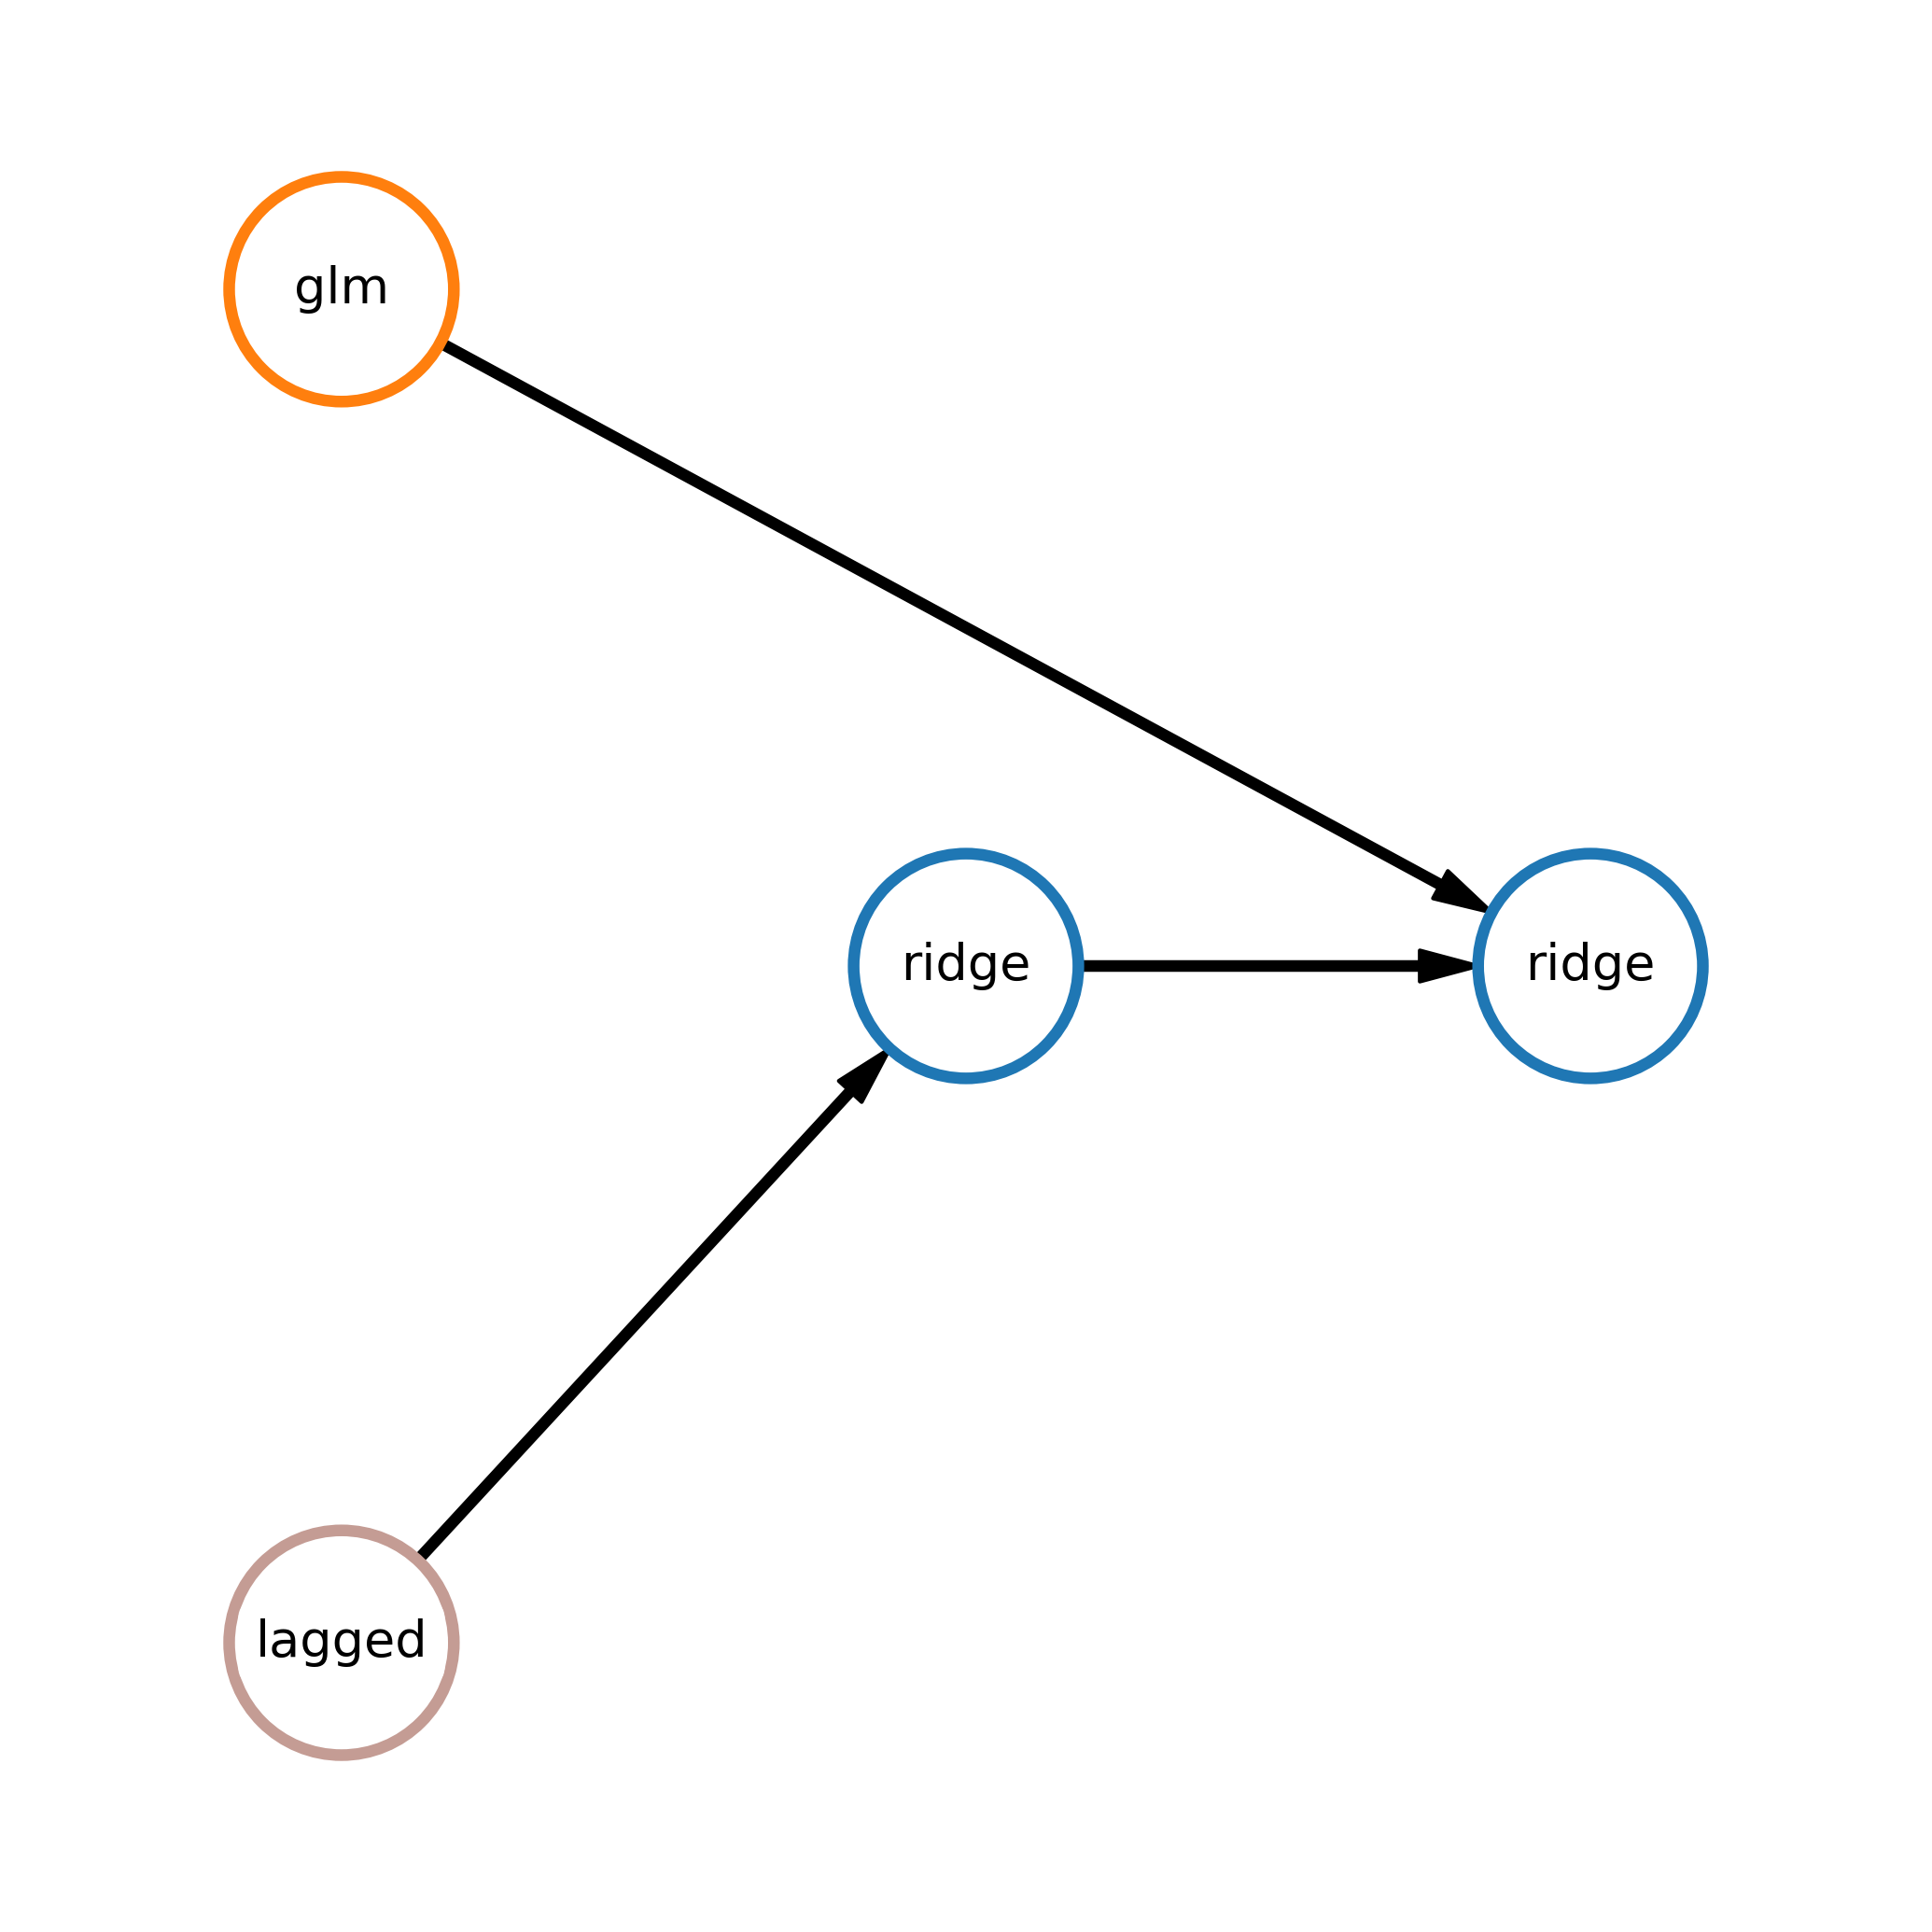

In [11]:
pipeline = model.fit(train_data)
forecast = model.forecast(test_data)
pipeline.show()

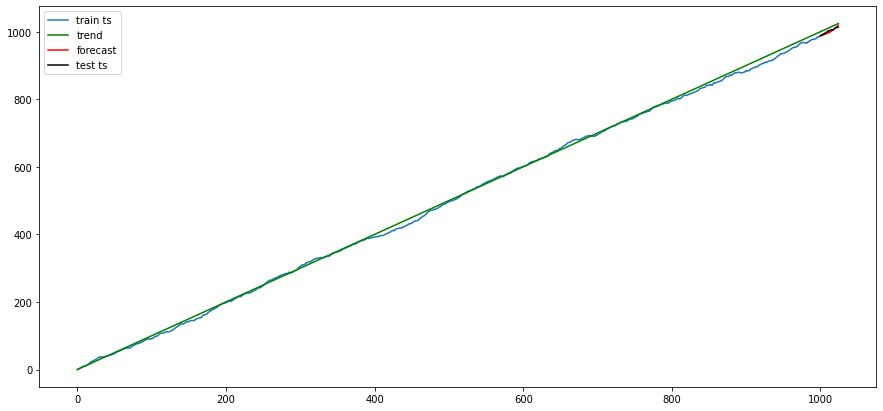

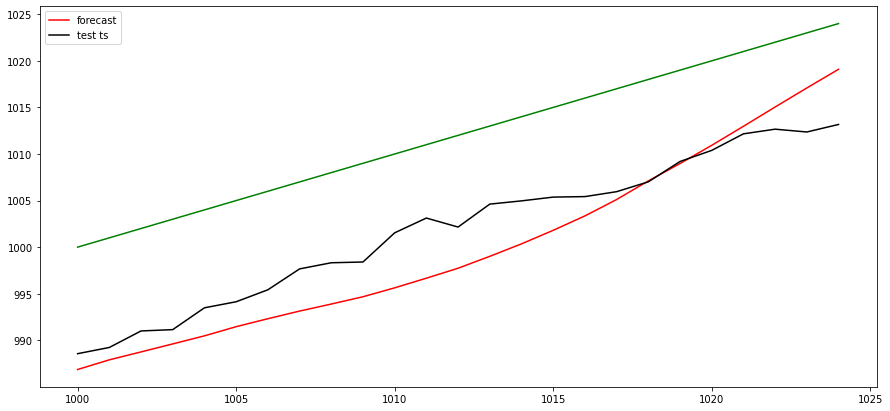

In [12]:
fig,ax  = plt.subplots()
fig.set(figwidth = 15,figheight = 7)
test_range = range(len(ts), len(ts)+len(ts_test))
test_range = range(end,end+horizon)
train_range = range(start,end)
total_range = range(start,end+horizon)

ax.plot(train_range,ts, label = 'train ts')
if trend is not None:
    ax.plot(train_range, trend,color = 'green',label = 'trend')
if trend_test is not None:
    ax.plot(test_range, trend_test,color = 'green')
ax.plot(test_range,forecast, color = 'red', label = 'forecast')
ax.plot(test_range, ts_test,color = 'black', label = 'test ts')
plt.legend();

fig1,ax1 = plt.subplots()
fig1.set(figwidth = 15,figheight = 7)

if trend_test is not None:
    ax1.plot(test_range, trend_test,color = 'green')
ax1.plot(test_range,forecast, color = 'red', label = 'forecast')
ax1.plot(test_range, ts_test,color = 'black', label = 'test ts')
plt.legend();

In [13]:
import sys
from sklearn.metrics import mean_squared_error as mse
from fedot.core.composer.metrics import QualityMetric
from fedot.core.data.data import InputData, OutputData
from fedot.core.repository.tasks import TsForecastingParams

def quantile_loss(y_true, y_pred, quantile=0.5):
    res = np.array(y_true)-np.array(y_pred)
    metrics=np.empty(shape = [0])
    for x in res:
        if x>=0:
            metrics = np.append(metrics, quantile*x)
        else:
            metrics = np.append(metrics,(quantile-1)*x)
    return np.mean(metrics)

class Quantile_Loss_1(QualityMetric):
    default_value = sys.maxsize

    @staticmethod
    def metric(reference: InputData, predicted: OutputData) -> float:
        value = quantile_loss(reference.target, predicted.predict,quantile = 0.1)
        return value


class Quantile_Loss_9(QualityMetric):
    default_value = sys.maxsize

    @staticmethod
    def metric(reference: InputData, predicted: OutputData) -> float:
        value = quantile_loss(reference.target, predicted.predict,quantile = 0.9)
        return value

In [14]:
#importing for tuning
from fedot.core.optimisers.adapters import PipelineAdapter
from fedot.core.pipelines.tuning.tuner_builder import TunerBuilder
from fedot.core.repository.quality_metrics_repository import RegressionMetricsEnum
from fedot.core.pipelines.tuning.tuner_interface import HyperoptTuner
from fedot.core.pipelines.tuning.unified import PipelineTuner
from fedot.core.optimisers.composer_requirements import ComposerRequirements
import datetime

from fedot.core.repository.quality_metrics_repository import RegressionMetricsEnum

#these parameters are the same for both tuners below
task = Task(TaskTypesEnum.ts_forecasting,TsForecastingParams(forecast_length=horizon))
composer_requirements = ComposerRequirements()
composer_requirements.validation_blocks = 2
composer_requirements.n_jobs= -1
composer_requirements.show_progress = True

#this tuner will be used to create lower confidence interval
low_tuner = TunerBuilder(task = task) \
         .with_tuner(PipelineTuner) \
         .with_metric(Quantile_Loss_1.get_value) \
         .with_iterations(10) \
         .with_timeout(datetime.timedelta(minutes=2)) \
         .with_requirements(composer_requirements) \
         .build(train_data)

#this tuner will be used to create uppper confidence interval
up_tuner = TunerBuilder(task = task) \
         .with_tuner(PipelineTuner) \
         .with_metric(Quantile_Loss_9.get_value) \
         .with_iterations(10) \
         .with_timeout(datetime.timedelta(minutes=2)) \
         .with_requirements(composer_requirements) \
         .build(train_data)

INFO:root:DataSourceSplitter - Hold out validation is applied.


2022-11-22 16:03:20,291 - DataSourceSplitter - Hold out validation is applied.


INFO:root:DataSourceSplitter - Hold out validation is applied.


2022-11-22 16:03:20,300 - DataSourceSplitter - Hold out validation is applied.


In [15]:
def quantile_maker(quantile,arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    up = []
    low = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        q_up = np.quantile(x, 1-quantile)
        up.append(q_up)
        q_low = np.quantile(x,quantile)
        low.append(q_low)
    up = np.array(up)
    low = np.array(low)
    return {'up':up,'low':low}

def mean_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    average = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        average.append(x.mean())
    return average

def median_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    median = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        median.append(np.median(x))
    return median

def absolute_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    maximum = []
    minimum = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        maximum.append(np.max(x))
        minimum.append(np.min(x))
    return {'up':np.array(maximum),'low':np.array(minimum)}

from scipy.stats import trim_mean
def truncated_mean_maker(arrays, quantile=0.1):
    number_arrays = len(arrays)
    l = len(arrays[0])
    trunc_mean = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        trunc_mean.append(trim_mean(x, quantile))
    return np.array(trunc_mean)

In [16]:
def conf_int_maker(model = model,
                   train_ts = ts,
                   number_models = 10, 
                   pipelines_show= False):
    """
    model - a fedot model of interest
    train_ts - the ts used for training the model
    ts_test - the testing series; used for plotting and visualization of the results
    number_models - number of models used to create the confidence intervals
    regim - type of getting lower and upper confidence intervals from the upper and lower arrays; 
            default is 'quantile' also avaliable 'average' and 'median', 'absolute_bounds', 'truncated_mean'
    plot - boolean parameter indicating wheter to show plot of the forecast and confidence intervals
    plot_history - boolean parameter indicating whether to show previous series
    """
    
    horizon = model.params.task.task_params.forecast_length
    train_data = model.train_data
    test_data = model.test_data
    forecast = model.predict(test_data)

    #4 lines below allow us take the best models
    fits = []
    for ind in model.history.individuals[-1]:
        fits.append(ind.fitness.value)
    fits = np.sort(np.array(fits))

    #create up and low predictions
    up_predictions = []
    low_predictions = []
    
    s=1
    for ind in model.history.individuals[-1]:
        if ind.fitness.value<=fits[number_models]:
            pipeline = PipelineAdapter().restore(ind.graph)
            print(f'Fitting pipeline №{s}')
            s+=1
            if pipelines_show:
                pipeline.show()
            
            
            #tuning upper confidence interval
            tuned_pipeline = up_tuner.tune(pipeline)
            tuned_pipeline.fit(train_data)
            preds = tuned_pipeline.predict(test_data).predict.ravel()
            up_predictions.append(preds)
            del tuned_pipeline
            
            #tuning lower confidence interval
            tuned_pipeline = low_tuner.tune(pipeline)
            tuned_pipeline.fit(train_data)
            preds = tuned_pipeline.predict(test_data).predict.ravel()
            low_predictions.append(preds)
            del tuned_pipeline
    return {'up_predictions':up_predictions, 'low_predictions':low_predictions}

In [17]:
def conf_int_plotting(up_predictions,
                      low_predictions,
                      horizon=horizon,
                      forecast=forecast,
                      ts=ts,
                      ts_test=ts_test,
                      trend_test=trend_test,
                      regim = 'quantile',
                      plot_history = True,
                      plot_up_int = True,
                      plot_low_int = True,
                      plot_trend = True,
                      plot_forecast = True,
                      plot_upper_train = True,
                      plot_lower_train = True,
                      plot_ts_test = True):
    if regim == 'quantile':
        up_res= quantile_maker(quantile = 0.1, arrays = up_predictions)['up']
        low_res= quantile_maker(quantile = 0.1, arrays = low_predictions)['low']
    if regim == 'mean':
        up_res = mean_maker(arrays = up_predictions)
        low_res = mean_maker(arrays = low_predictions)
    if regim == 'median':
        up_res = median_maker(arrays = up_predictions)
        low_res = median_maker(arrays = low_predictions)
    if regim == 'absolute_bounds':
        up_res = absolute_maker(arrays = up_predictions)['up']
        low_res = absolute_maker(arrays = low_predictions)['low']
    if regim == 'truncated_mean':
        up_res = truncated_mean_maker(arrays = up_predictions)
        low_res = truncated_mean_maker(arrays = low_predictions)
    
    up = np.maximum(up_res,forecast)  
    low = np.minimum(low_res,forecast)

    r = range(1,horizon+1)
    fig,ax = plt.subplots()
    fig.set(figwidth = 15,figheight = 7)
    for i in range(len(up_predictions)):
        if i==0:
            if plot_upper_train:
                ax.plot(r,up_predictions[i], color = 'yellow',label = 'preds for up train')
            if plot_lower_train:
                ax.plot(r,low_predictions[i], color = 'pink',label = 'preds for low train')
        else:
            if plot_upper_train:
                ax.plot(r,up_predictions[i], color = 'yellow')
            if plot_lower_train:
                ax.plot(r,low_predictions[i], color = 'pink')    
    if plot_up_int:
        ax.plot(r,up, color = 'blue', label  = 'Up',marker= '.')
    if plot_low_int:
        ax.plot(r,low, color = 'green', label  = 'Low',marker = '.')
    if plot_forecast:
        ax.plot(r,forecast, color = 'red', label = 'Forecast')
    if ts_test is not None:
        if plot_ts_test:
            ax.plot(r,ts_test,color = 'black', label = 'Actual TS')
    if trend_test is not None:
        if plot_trend:
            ax.plot(r, trend_test, color = 'magenta', label = 'True Trend')
    plt.legend()
    if plot_history:
        fig1,ax1 = plt.subplots()
        
        fig1.set(figwidth = 15,figheight = 7)
       
        train_range = range(len(ts))
        test_range = range(len(ts),len(ts)+horizon)
        
        ax1.plot(train_range,ts, color = 'gray',label = 'Train ts')
        ax1.plot(test_range, up,color = 'blue', label = 'Up')
        ax1.plot(test_range, low,color = 'green', label = 'Low')
        ax1.plot(test_range,forecast, color = 'red', label = 'Forecast')
        if ts_test is not None:
            ax1.plot(test_range, ts_test,color = 'black', label = 'Actual TS')  
        if trend_test is not None:
            ax1.plot(test_range, trend_test, color = 'magenta', label = 'True Trend')
        plt.legend();

In [20]:
x = conf_int_maker(model = model, number_models =7,pipelines_show = False)

INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №1
2022-11-22 16:12:03,347 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006498 seconds


2022-11-22 16:12:03,575 - build_posterior_wrapper took 0.006498 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:12:03,584 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:11,  1.33s/trial, best loss: 2.2626456976283302]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005921 seconds


2022-11-22 16:12:04,903 - build_posterior_wrapper took 0.005921 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 2.262646


2022-11-22 16:12:04,916 - TPE using 1/1 trials with best loss 2.262646
 20%|██        | 2/10 [00:01<00:06,  1.15trial/s, best loss: 0.8660410442031341]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006346 seconds


2022-11-22 16:12:05,467 - build_posterior_wrapper took 0.006346 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.866041


2022-11-22 16:12:05,474 - TPE using 2/2 trials with best loss 0.866041
 30%|███       | 3/10 [00:02<00:05,  1.26trial/s, best loss: 0.4449627649468952]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006143 seconds


2022-11-22 16:12:06,152 - build_posterior_wrapper took 0.006143 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.444963


2022-11-22 16:12:06,162 - TPE using 3/3 trials with best loss 0.444963
 40%|████      | 4/10 [00:02<00:03,  1.69trial/s, best loss: 0.4449627649468952]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006211 seconds


2022-11-22 16:12:06,438 - build_posterior_wrapper took 0.006211 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.444963


2022-11-22 16:12:06,453 - TPE using 4/4 trials with best loss 0.444963
 50%|█████     | 5/10 [00:03<00:02,  1.98trial/s, best loss: 0.4449627649468952]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006463 seconds


2022-11-22 16:12:06,793 - build_posterior_wrapper took 0.006463 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.444963


2022-11-22 16:12:06,806 - TPE using 5/5 trials with best loss 0.444963
 60%|██████    | 6/10 [00:03<00:01,  2.32trial/s, best loss: 0.33981736198186646]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006464 seconds


2022-11-22 16:12:07,081 - build_posterior_wrapper took 0.006464 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.339817


2022-11-22 16:12:07,089 - TPE using 6/6 trials with best loss 0.339817
 70%|███████   | 7/10 [00:04<00:02,  1.37trial/s, best loss: 0.33981736198186646]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006228 seconds


2022-11-22 16:12:08,423 - build_posterior_wrapper took 0.006228 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.339817


2022-11-22 16:12:08,433 - TPE using 7/7 trials with best loss 0.339817
 80%|████████  | 8/10 [00:06<00:01,  1.14trial/s, best loss: 0.33981736198186646]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007745 seconds


2022-11-22 16:12:09,609 - build_posterior_wrapper took 0.007745 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.339817


2022-11-22 16:12:09,624 - TPE using 8/8 trials with best loss 0.339817
 90%|█████████ | 9/10 [00:06<00:00,  1.22trial/s, best loss: 0.33981736198186646]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006251 seconds


2022-11-22 16:12:10,305 - build_posterior_wrapper took 0.006251 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.339817


2022-11-22 16:12:10,318 - TPE using 9/9 trials with best loss 0.339817
100%|██████████| 10/10 [00:07<00:00,  1.42trial/s, best loss: 0.33981736198186646]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:12:10,863 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.340 equal or better than initial (+ 5% deviation) 0.633


2022-11-22 16:12:10,869 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.340 equal or better than initial (+ 5% deviation) 0.633


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 16:12:11,127 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006206 seconds


2022-11-22 16:12:11,408 - build_posterior_wrapper took 0.006206 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:12:11,414 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:04,  2.18trial/s, best loss: 0.8139733655989895]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006042 seconds


2022-11-22 16:12:11,869 - build_posterior_wrapper took 0.006042 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.813973


2022-11-22 16:12:11,875 - TPE using 1/1 trials with best loss 0.813973
 20%|██        | 2/10 [00:00<00:02,  2.78trial/s, best loss: 0.8139733655989895]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005996 seconds


2022-11-22 16:12:12,161 - build_posterior_wrapper took 0.005996 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.813973


2022-11-22 16:12:12,172 - TPE using 2/2 trials with best loss 0.813973
 30%|███       | 3/10 [00:01<00:05,  1.31trial/s, best loss: 0.8139733655989895]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008333 seconds


2022-11-22 16:12:13,403 - build_posterior_wrapper took 0.008333 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.813973


2022-11-22 16:12:13,409 - TPE using 3/3 trials with best loss 0.813973
 40%|████      | 4/10 [00:03<00:06,  1.04s/trial, best loss: 0.8139733655989895]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006413 seconds


2022-11-22 16:12:14,878 - build_posterior_wrapper took 0.006413 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.813973


2022-11-22 16:12:14,885 - TPE using 4/4 trials with best loss 0.813973
 50%|█████     | 5/10 [00:04<00:04,  1.15trial/s, best loss: 0.8139733655989895]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007269 seconds


2022-11-22 16:12:15,433 - build_posterior_wrapper took 0.007269 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.813973


2022-11-22 16:12:15,441 - TPE using 5/5 trials with best loss 0.813973
 60%|██████    | 6/10 [00:04<00:03,  1.23trial/s, best loss: 0.8139733655989895]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006468 seconds


2022-11-22 16:12:16,138 - build_posterior_wrapper took 0.006468 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.813973


2022-11-22 16:12:16,145 - TPE using 6/6 trials with best loss 0.813973
 70%|███████   | 7/10 [00:05<00:02,  1.20trial/s, best loss: 0.8139733655989895]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007607 seconds


2022-11-22 16:12:17,013 - build_posterior_wrapper took 0.007607 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.813973


2022-11-22 16:12:17,020 - TPE using 7/7 trials with best loss 0.813973
 80%|████████  | 8/10 [00:06<00:01,  1.20trial/s, best loss: 0.8139733655989895]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005724 seconds


2022-11-22 16:12:17,840 - build_posterior_wrapper took 0.005724 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.813973


2022-11-22 16:12:17,848 - TPE using 8/8 trials with best loss 0.813973
 90%|█████████ | 9/10 [00:07<00:00,  1.08trial/s, best loss: 0.8139733655989895]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007179 seconds


2022-11-22 16:12:18,975 - build_posterior_wrapper took 0.007179 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.813973


2022-11-22 16:12:18,981 - TPE using 9/9 trials with best loss 0.813973
100%|██████████| 10/10 [00:08<00:00,  1.14trial/s, best loss: 0.8139733655989895]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:12:20,627 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.814 equal or better than initial (+ 5% deviation) 2.716


2022-11-22 16:12:20,634 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.814 equal or better than initial (+ 5% deviation) 2.716


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №2
2022-11-22 16:12:21,072 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009333 seconds


2022-11-22 16:12:21,405 - build_posterior_wrapper took 0.009333 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:12:21,412 - TPE using 0 trials
 10%|█         | 1/10 [00:03<00:27,  3.07s/trial, best loss: 2.0200614738007414]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004162 seconds


2022-11-22 16:12:24,471 - build_posterior_wrapper took 0.004162 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 2.020061


2022-11-22 16:12:24,482 - TPE using 1/1 trials with best loss 2.020061
 20%|██        | 2/10 [00:05<00:22,  2.81s/trial, best loss: 1.1728509075352347]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004295 seconds


2022-11-22 16:12:27,103 - build_posterior_wrapper took 0.004295 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 1.172851


2022-11-22 16:12:27,114 - TPE using 2/2 trials with best loss 1.172851
 30%|███       | 3/10 [00:06<00:14,  2.07s/trial, best loss: 0.8709058035475585]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008733 seconds


2022-11-22 16:12:28,290 - build_posterior_wrapper took 0.008733 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.870906


2022-11-22 16:12:28,295 - TPE using 3/3 trials with best loss 0.870906
 40%|████      | 4/10 [00:11<00:17,  2.91s/trial, best loss: 0.7367644433710722]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007618 seconds


2022-11-22 16:12:32,501 - build_posterior_wrapper took 0.007618 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.736764


2022-11-22 16:12:32,507 - TPE using 4/4 trials with best loss 0.736764
 50%|█████     | 5/10 [00:15<00:16,  3.29s/trial, best loss: 0.7367644433710722]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006637 seconds


2022-11-22 16:12:36,463 - build_posterior_wrapper took 0.006637 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.736764


2022-11-22 16:12:36,469 - TPE using 5/5 trials with best loss 0.736764
 60%|██████    | 6/10 [00:16<00:10,  2.55s/trial, best loss: 0.7367644433710722]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007009 seconds


2022-11-22 16:12:37,574 - build_posterior_wrapper took 0.007009 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.736764


2022-11-22 16:12:37,581 - TPE using 6/6 trials with best loss 0.736764
 70%|███████   | 7/10 [00:19<00:08,  2.94s/trial, best loss: 0.7367644433710722]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007471 seconds


2022-11-22 16:12:41,301 - build_posterior_wrapper took 0.007471 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.736764


2022-11-22 16:12:41,306 - TPE using 7/7 trials with best loss 0.736764
 80%|████████  | 8/10 [00:20<00:04,  2.24s/trial, best loss: 0.7367644433710722]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006741 seconds


2022-11-22 16:12:42,063 - build_posterior_wrapper took 0.006741 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.736764


2022-11-22 16:12:42,069 - TPE using 8/8 trials with best loss 0.736764
 90%|█████████ | 9/10 [00:23<00:02,  2.35s/trial, best loss: 0.7367644433710722]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008514 seconds


2022-11-22 16:12:44,636 - build_posterior_wrapper took 0.008514 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.736764


2022-11-22 16:12:44,643 - TPE using 9/9 trials with best loss 0.736764
100%|██████████| 10/10 [00:27<00:00,  2.71s/trial, best loss: 0.7367644433710722]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:12:52,588 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.737 equal or better than initial (+ 5% deviation) 1.446


2022-11-22 16:12:52,595 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.737 equal or better than initial (+ 5% deviation) 1.446


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 16:12:55,562 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008760 seconds


2022-11-22 16:12:59,809 - build_posterior_wrapper took 0.008760 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:12:59,815 - TPE using 0 trials
 10%|█         | 1/10 [00:02<00:22,  2.45s/trial, best loss: 373.71049047629646]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010165 seconds


2022-11-22 16:13:02,268 - build_posterior_wrapper took 0.010165 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 373.710490


2022-11-22 16:13:02,275 - TPE using 1/1 trials with best loss 373.710490
 20%|██        | 2/10 [00:05<00:24,  3.02s/trial, best loss: 21.421350480818]   

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003994 seconds


2022-11-22 16:13:05,681 - build_posterior_wrapper took 0.003994 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 21.421350


2022-11-22 16:13:05,692 - TPE using 2/2 trials with best loss 21.421350
 30%|███       | 3/10 [00:06<00:13,  1.94s/trial, best loss: 8.459507002817984]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007855 seconds


2022-11-22 16:13:06,347 - build_posterior_wrapper took 0.007855 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 8.459507


2022-11-22 16:13:06,354 - TPE using 3/3 trials with best loss 8.459507
 40%|████      | 4/10 [00:09<00:12,  2.17s/trial, best loss: 1.7337208314530281]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008358 seconds


2022-11-22 16:13:08,855 - build_posterior_wrapper took 0.008358 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 1.733721


2022-11-22 16:13:08,862 - TPE using 4/4 trials with best loss 1.733721
 50%|█████     | 5/10 [00:11<00:11,  2.34s/trial, best loss: 1.7337208314530281]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004344 seconds


2022-11-22 16:13:11,490 - build_posterior_wrapper took 0.004344 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 1.733721


2022-11-22 16:13:11,501 - TPE using 5/5 trials with best loss 1.733721
 60%|██████    | 6/10 [00:12<00:07,  1.95s/trial, best loss: 1.4197946832196435]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008129 seconds


2022-11-22 16:13:12,697 - build_posterior_wrapper took 0.008129 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 1.419795


2022-11-22 16:13:12,702 - TPE using 6/6 trials with best loss 1.419795
 70%|███████   | 7/10 [00:14<00:05,  1.80s/trial, best loss: 1.4197946832196435]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003892 seconds


2022-11-22 16:13:14,194 - build_posterior_wrapper took 0.003892 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 1.419795


2022-11-22 16:13:14,201 - TPE using 7/7 trials with best loss 1.419795
 80%|████████  | 8/10 [00:15<00:03,  1.67s/trial, best loss: 0.7982416615638387]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008531 seconds


2022-11-22 16:13:15,585 - build_posterior_wrapper took 0.008531 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.798242


2022-11-22 16:13:15,591 - TPE using 8/8 trials with best loss 0.798242
 90%|█████████ | 9/10 [00:18<00:01,  1.92s/trial, best loss: 0.7982416615638387]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004047 seconds


2022-11-22 16:13:18,060 - build_posterior_wrapper took 0.004047 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.798242


2022-11-22 16:13:18,070 - TPE using 9/9 trials with best loss 0.798242
100%|██████████| 10/10 [00:20<00:00,  2.07s/trial, best loss: 0.7982416615638387]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:13:21,903 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.798 equal or better than initial (+ 5% deviation) 5.858


2022-11-22 16:13:21,907 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.798 equal or better than initial (+ 5% deviation) 5.858


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №3
2022-11-22 16:13:22,975 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007719 seconds


2022-11-22 16:13:23,215 - build_posterior_wrapper took 0.007719 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:13:23,223 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:02,  3.62trial/s, best loss: 1.5770716899178137]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008104 seconds


2022-11-22 16:13:23,494 - build_posterior_wrapper took 0.008104 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 1.577072


2022-11-22 16:13:23,504 - TPE using 1/1 trials with best loss 1.577072
 20%|██        | 2/10 [00:00<00:02,  3.35trial/s, best loss: 1.5770716899178137]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013222 seconds


2022-11-22 16:13:23,819 - build_posterior_wrapper took 0.013222 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 1.577072


2022-11-22 16:13:23,835 - TPE using 2/2 trials with best loss 1.577072
 30%|███       | 3/10 [00:01<00:02,  2.60trial/s, best loss: 0.5912401201624147]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007355 seconds


2022-11-22 16:13:24,297 - build_posterior_wrapper took 0.007355 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.591240


2022-11-22 16:13:24,304 - TPE using 3/3 trials with best loss 0.591240
 40%|████      | 4/10 [00:02<00:03,  1.56trial/s, best loss: 0.5912401201624147]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006652 seconds


2022-11-22 16:13:25,328 - build_posterior_wrapper took 0.006652 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.591240


2022-11-22 16:13:25,335 - TPE using 4/4 trials with best loss 0.591240
 50%|█████     | 5/10 [00:02<00:02,  1.82trial/s, best loss: 0.5912401201624147]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005725 seconds


2022-11-22 16:13:25,712 - build_posterior_wrapper took 0.005725 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.591240


2022-11-22 16:13:25,729 - TPE using 5/5 trials with best loss 0.591240
 60%|██████    | 6/10 [00:02<00:01,  2.07trial/s, best loss: 0.46372810477154475]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005795 seconds


2022-11-22 16:13:26,070 - build_posterior_wrapper took 0.005795 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.463728


2022-11-22 16:13:26,080 - TPE using 6/6 trials with best loss 0.463728
 70%|███████   | 7/10 [00:03<00:01,  1.57trial/s, best loss: 0.46372810477154475]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006854 seconds


2022-11-22 16:13:27,024 - build_posterior_wrapper took 0.006854 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.463728


2022-11-22 16:13:27,038 - TPE using 7/7 trials with best loss 0.463728
 80%|████████  | 8/10 [00:04<00:01,  1.81trial/s, best loss: 0.46372810477154475]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006507 seconds


2022-11-22 16:13:27,395 - build_posterior_wrapper took 0.006507 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.463728


2022-11-22 16:13:27,405 - TPE using 8/8 trials with best loss 0.463728
 90%|█████████ | 9/10 [00:04<00:00,  1.82trial/s, best loss: 0.46372810477154475]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006975 seconds


2022-11-22 16:13:27,933 - build_posterior_wrapper took 0.006975 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.463728


2022-11-22 16:13:27,940 - TPE using 9/9 trials with best loss 0.463728
100%|██████████| 10/10 [00:05<00:00,  1.93trial/s, best loss: 0.46372810477154475]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:13:28,762 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.464 equal or better than initial (+ 5% deviation) 0.577


2022-11-22 16:13:28,769 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.464 equal or better than initial (+ 5% deviation) 0.577


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 16:13:29,116 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005958 seconds


2022-11-22 16:13:29,487 - build_posterior_wrapper took 0.005958 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:13:29,499 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:03,  2.76trial/s, best loss: 24.72868393597003]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006599 seconds


2022-11-22 16:13:29,851 - build_posterior_wrapper took 0.006599 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 24.728684


2022-11-22 16:13:29,861 - TPE using 1/1 trials with best loss 24.728684
 20%|██        | 2/10 [00:00<00:04,  2.00trial/s, best loss: 1.0770391274994777]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006370 seconds


2022-11-22 16:13:30,456 - build_posterior_wrapper took 0.006370 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 1.077039


2022-11-22 16:13:30,470 - TPE using 2/2 trials with best loss 1.077039
 30%|███       | 3/10 [00:01<00:04,  1.42trial/s, best loss: 1.0770391274994777]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006610 seconds


2022-11-22 16:13:31,404 - build_posterior_wrapper took 0.006610 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 1.077039


2022-11-22 16:13:31,415 - TPE using 3/3 trials with best loss 1.077039
 40%|████      | 4/10 [00:02<00:04,  1.36trial/s, best loss: 1.0770391274994777]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006586 seconds


2022-11-22 16:13:32,188 - build_posterior_wrapper took 0.006586 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 1.077039


2022-11-22 16:13:32,203 - TPE using 4/4 trials with best loss 1.077039
 50%|█████     | 5/10 [00:03<00:03,  1.53trial/s, best loss: 0.8125935785369187]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005841 seconds


2022-11-22 16:13:32,686 - build_posterior_wrapper took 0.005841 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.812594


2022-11-22 16:13:32,695 - TPE using 5/5 trials with best loss 0.812594
 60%|██████    | 6/10 [00:03<00:02,  1.52trial/s, best loss: 0.8125935785369187]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005946 seconds


2022-11-22 16:13:33,348 - build_posterior_wrapper took 0.005946 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.812594


2022-11-22 16:13:33,360 - TPE using 6/6 trials with best loss 0.812594
 70%|███████   | 7/10 [00:04<00:01,  1.53trial/s, best loss: 0.8125935785369187]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010564 seconds


2022-11-22 16:13:34,002 - build_posterior_wrapper took 0.010564 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.812594


2022-11-22 16:13:34,014 - TPE using 7/7 trials with best loss 0.812594
 80%|████████  | 8/10 [00:05<00:01,  1.45trial/s, best loss: 0.8125935785369187]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005867 seconds


2022-11-22 16:13:34,767 - build_posterior_wrapper took 0.005867 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.812594


2022-11-22 16:13:34,777 - TPE using 8/8 trials with best loss 0.812594
 90%|█████████ | 9/10 [00:05<00:00,  1.59trial/s, best loss: 0.8125935785369187]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009191 seconds


2022-11-22 16:13:35,260 - build_posterior_wrapper took 0.009191 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.812594


2022-11-22 16:13:35,268 - TPE using 9/9 trials with best loss 0.812594
100%|██████████| 10/10 [00:06<00:00,  1.52trial/s, best loss: 0.8125935785369187]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:13:36,565 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.813 equal or better than initial (+ 5% deviation) 2.205


2022-11-22 16:13:36,574 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.813 equal or better than initial (+ 5% deviation) 2.205


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №4
2022-11-22 16:13:37,057 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006473 seconds


2022-11-22 16:13:37,353 - build_posterior_wrapper took 0.006473 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:13:37,362 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:02,  3.43trial/s, best loss: 1.5184069178426167]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006005 seconds


2022-11-22 16:13:37,648 - build_posterior_wrapper took 0.006005 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 1.518407


2022-11-22 16:13:37,654 - TPE using 1/1 trials with best loss 1.518407
 20%|██        | 2/10 [00:01<00:07,  1.03trial/s, best loss: 1.5184069178426167]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010065 seconds


2022-11-22 16:13:39,093 - build_posterior_wrapper took 0.010065 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 1.518407


2022-11-22 16:13:39,104 - TPE using 2/2 trials with best loss 1.518407
 30%|███       | 3/10 [00:02<00:05,  1.37trial/s, best loss: 0.8055045800063703]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009129 seconds


2022-11-22 16:13:39,545 - build_posterior_wrapper took 0.009129 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.805505


2022-11-22 16:13:39,552 - TPE using 3/3 trials with best loss 0.805505
 40%|████      | 4/10 [00:03<00:04,  1.21trial/s, best loss: 0.8055045800063703]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007916 seconds


2022-11-22 16:13:40,514 - build_posterior_wrapper took 0.007916 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.805505


2022-11-22 16:13:40,525 - TPE using 4/4 trials with best loss 0.805505
 50%|█████     | 5/10 [00:03<00:03,  1.26trial/s, best loss: 0.4478846286005329]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010120 seconds


2022-11-22 16:13:41,254 - build_posterior_wrapper took 0.010120 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.447885


2022-11-22 16:13:41,266 - TPE using 5/5 trials with best loss 0.447885
 60%|██████    | 6/10 [00:05<00:04,  1.04s/trial, best loss: 0.4478846286005329]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011919 seconds


2022-11-22 16:13:42,785 - build_posterior_wrapper took 0.011919 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.447885


2022-11-22 16:13:42,797 - TPE using 6/6 trials with best loss 0.447885
 70%|███████   | 7/10 [00:06<00:03,  1.13s/trial, best loss: 0.4478846286005329]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008291 seconds


2022-11-22 16:13:44,104 - build_posterior_wrapper took 0.008291 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.447885


2022-11-22 16:13:44,116 - TPE using 7/7 trials with best loss 0.447885
 80%|████████  | 8/10 [00:07<00:01,  1.05trial/s, best loss: 0.4478846286005329]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005833 seconds


2022-11-22 16:13:44,667 - build_posterior_wrapper took 0.005833 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.447885


2022-11-22 16:13:44,688 - TPE using 8/8 trials with best loss 0.447885
 90%|█████████ | 9/10 [00:07<00:00,  1.22trial/s, best loss: 0.4478846286005329]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010875 seconds


2022-11-22 16:13:45,189 - build_posterior_wrapper took 0.010875 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.447885


2022-11-22 16:13:45,203 - TPE using 9/9 trials with best loss 0.447885
100%|██████████| 10/10 [00:09<00:00,  1.06trial/s, best loss: 0.4478846286005329]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:13:47,539 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.448 equal or better than initial (+ 5% deviation) 1.427


2022-11-22 16:13:47,554 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.448 equal or better than initial (+ 5% deviation) 1.427


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 16:13:48,265 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008991 seconds


2022-11-22 16:13:49,034 - build_posterior_wrapper took 0.008991 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:13:49,052 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:07,  1.23trial/s, best loss: 3.8502924912522976]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007359 seconds


2022-11-22 16:13:49,850 - build_posterior_wrapper took 0.007359 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 3.850292


2022-11-22 16:13:49,864 - TPE using 1/1 trials with best loss 3.850292
 20%|██        | 2/10 [00:01<00:04,  1.96trial/s, best loss: 3.8502924912522976]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006678 seconds


2022-11-22 16:13:50,149 - build_posterior_wrapper took 0.006678 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 3.850292


2022-11-22 16:13:50,157 - TPE using 2/2 trials with best loss 3.850292
 30%|███       | 3/10 [00:01<00:02,  2.35trial/s, best loss: 3.8502924912522976]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006397 seconds


2022-11-22 16:13:50,468 - build_posterior_wrapper took 0.006397 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 3.850292


2022-11-22 16:13:50,476 - TPE using 3/3 trials with best loss 3.850292
 40%|████      | 4/10 [00:02<00:03,  1.58trial/s, best loss: 3.8502924912522976]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015479 seconds


2022-11-22 16:13:51,423 - build_posterior_wrapper took 0.015479 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 3.850292


2022-11-22 16:13:51,430 - TPE using 4/4 trials with best loss 3.850292
 50%|█████     | 5/10 [00:03<00:04,  1.12trial/s, best loss: 3.8502924912522976]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010405 seconds


2022-11-22 16:13:52,768 - build_posterior_wrapper took 0.010405 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 3.850292


2022-11-22 16:13:52,778 - TPE using 5/5 trials with best loss 3.850292
 60%|██████    | 6/10 [00:04<00:02,  1.46trial/s, best loss: 1.9731789513129128]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010921 seconds


2022-11-22 16:13:53,057 - build_posterior_wrapper took 0.010921 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 1.973179


2022-11-22 16:13:53,071 - TPE using 6/6 trials with best loss 1.973179
 70%|███████   | 7/10 [00:05<00:02,  1.18trial/s, best loss: 1.9731789513129128]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011052 seconds


2022-11-22 16:13:54,244 - build_posterior_wrapper took 0.011052 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 1.973179


2022-11-22 16:13:54,258 - TPE using 7/7 trials with best loss 1.973179
 80%|████████  | 8/10 [00:06<00:01,  1.09trial/s, best loss: 1.9731789513129128]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.016143 seconds


2022-11-22 16:13:55,300 - build_posterior_wrapper took 0.016143 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 1.973179


2022-11-22 16:13:55,316 - TPE using 8/8 trials with best loss 1.973179
 90%|█████████ | 9/10 [00:06<00:00,  1.26trial/s, best loss: 0.746631690124012] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009365 seconds


2022-11-22 16:13:55,829 - build_posterior_wrapper took 0.009365 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.746632


2022-11-22 16:13:55,843 - TPE using 9/9 trials with best loss 0.746632
100%|██████████| 10/10 [00:08<00:00,  1.21trial/s, best loss: 0.746631690124012]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:13:57,773 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.747 equal or better than initial (+ 5% deviation) 3.072


2022-11-22 16:13:57,780 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.747 equal or better than initial (+ 5% deviation) 3.072


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №5
2022-11-22 16:13:58,268 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005777 seconds


2022-11-22 16:13:58,548 - build_posterior_wrapper took 0.005777 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:13:58,559 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:11,  1.24s/trial, best loss: 1.3565056571022935]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006648 seconds


2022-11-22 16:13:59,792 - build_posterior_wrapper took 0.006648 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 1.356506


2022-11-22 16:13:59,807 - TPE using 1/1 trials with best loss 1.356506
 20%|██        | 2/10 [00:02<00:07,  1.02trial/s, best loss: 0.5728283190301917]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006884 seconds


2022-11-22 16:14:00,606 - build_posterior_wrapper took 0.006884 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.572828


2022-11-22 16:14:00,625 - TPE using 2/2 trials with best loss 0.572828
 30%|███       | 3/10 [00:02<00:06,  1.06trial/s, best loss: 0.5728283190301917]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012206 seconds


2022-11-22 16:14:01,500 - build_posterior_wrapper took 0.012206 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.572828


2022-11-22 16:14:01,515 - TPE using 3/3 trials with best loss 0.572828
 40%|████      | 4/10 [00:03<00:04,  1.41trial/s, best loss: 0.5728283190301917]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005452 seconds


2022-11-22 16:14:01,837 - build_posterior_wrapper took 0.005452 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.572828


2022-11-22 16:14:01,852 - TPE using 4/4 trials with best loss 0.572828
 50%|█████     | 5/10 [00:04<00:04,  1.10trial/s, best loss: 0.5728283190301917]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006639 seconds


2022-11-22 16:14:03,112 - build_posterior_wrapper took 0.006639 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.572828


2022-11-22 16:14:03,123 - TPE using 5/5 trials with best loss 0.572828
 60%|██████    | 6/10 [00:05<00:03,  1.27trial/s, best loss: 0.5728283190301917]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014644 seconds


2022-11-22 16:14:03,665 - build_posterior_wrapper took 0.014644 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.572828


2022-11-22 16:14:03,678 - TPE using 6/6 trials with best loss 0.572828
 70%|███████   | 7/10 [00:06<00:02,  1.19trial/s, best loss: 0.5728283190301917]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005797 seconds


2022-11-22 16:14:04,611 - build_posterior_wrapper took 0.005797 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.572828


2022-11-22 16:14:04,622 - TPE using 7/7 trials with best loss 0.572828
 80%|████████  | 8/10 [00:06<00:01,  1.25trial/s, best loss: 0.5143976724358845]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010058 seconds


2022-11-22 16:14:05,316 - build_posterior_wrapper took 0.010058 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.514398


2022-11-22 16:14:05,335 - TPE using 8/8 trials with best loss 0.514398
 90%|█████████ | 9/10 [00:08<00:00,  1.07trial/s, best loss: 0.5143976724358845]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006367 seconds


2022-11-22 16:14:06,570 - build_posterior_wrapper took 0.006367 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.514398


2022-11-22 16:14:06,576 - TPE using 9/9 trials with best loss 0.514398
100%|██████████| 10/10 [00:08<00:00,  1.20trial/s, best loss: 0.43058152075765405]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:14:07,141 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.431 equal or better than initial (+ 5% deviation) 0.633


2022-11-22 16:14:07,147 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.431 equal or better than initial (+ 5% deviation) 0.633


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 16:14:07,405 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007344 seconds


2022-11-22 16:14:07,708 - build_posterior_wrapper took 0.007344 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:14:07,715 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:03,  2.38trial/s, best loss: 24.546740955074334]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009971 seconds


2022-11-22 16:14:08,138 - build_posterior_wrapper took 0.009971 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 24.546741


2022-11-22 16:14:08,153 - TPE using 1/1 trials with best loss 24.546741
 20%|██        | 2/10 [00:01<00:06,  1.29trial/s, best loss: 24.546740955074334]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010663 seconds


2022-11-22 16:14:09,160 - build_posterior_wrapper took 0.010663 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 24.546741


2022-11-22 16:14:09,175 - TPE using 2/2 trials with best loss 24.546741
 30%|███       | 3/10 [00:02<00:05,  1.22trial/s, best loss: 6.897337093969323] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006788 seconds


2022-11-22 16:14:10,027 - build_posterior_wrapper took 0.006788 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 6.897337


2022-11-22 16:14:10,038 - TPE using 3/3 trials with best loss 6.897337
 40%|████      | 4/10 [00:03<00:06,  1.10s/trial, best loss: 6.897337093969323]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005832 seconds


2022-11-22 16:14:11,543 - build_posterior_wrapper took 0.005832 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 6.897337


2022-11-22 16:14:11,557 - TPE using 4/4 trials with best loss 6.897337
 50%|█████     | 5/10 [00:04<00:05,  1.07s/trial, best loss: 6.897337093969323]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005831 seconds


2022-11-22 16:14:12,556 - build_posterior_wrapper took 0.005831 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 6.897337


2022-11-22 16:14:12,567 - TPE using 5/5 trials with best loss 6.897337
 60%|██████    | 6/10 [00:05<00:04,  1.08s/trial, best loss: 6.897337093969323]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006376 seconds


2022-11-22 16:14:13,673 - build_posterior_wrapper took 0.006376 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 6.897337


2022-11-22 16:14:13,684 - TPE using 6/6 trials with best loss 6.897337
 70%|███████   | 7/10 [00:06<00:02,  1.15trial/s, best loss: 1.562079859821806]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010062 seconds


2022-11-22 16:14:14,113 - build_posterior_wrapper took 0.010062 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 1.562080


2022-11-22 16:14:14,126 - TPE using 7/7 trials with best loss 1.562080
 80%|████████  | 8/10 [00:06<00:01,  1.32trial/s, best loss: 1.562079859821806]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006018 seconds


2022-11-22 16:14:14,612 - build_posterior_wrapper took 0.006018 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 1.562080


2022-11-22 16:14:14,624 - TPE using 8/8 trials with best loss 1.562080
 90%|█████████ | 9/10 [00:07<00:00,  1.58trial/s, best loss: 1.562079859821806]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006079 seconds


2022-11-22 16:14:14,974 - build_posterior_wrapper took 0.006079 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 1.562080


2022-11-22 16:14:14,986 - TPE using 9/9 trials with best loss 1.562080
100%|██████████| 10/10 [00:08<00:00,  1.15trial/s, best loss: 1.562079859821806]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:14:16,794 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.562 equal or better than initial (+ 5% deviation) 2.597


2022-11-22 16:14:16,812 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.562 equal or better than initial (+ 5% deviation) 2.597


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №6
2022-11-22 16:14:17,209 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006407 seconds


2022-11-22 16:14:17,494 - build_posterior_wrapper took 0.006407 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:14:17,505 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:03,  2.77trial/s, best loss: 58.38429882014818]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003636 seconds


2022-11-22 16:14:17,854 - build_posterior_wrapper took 0.003636 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 58.384299


2022-11-22 16:14:17,866 - TPE using 1/1 trials with best loss 58.384299
 20%|██        | 2/10 [00:01<00:04,  1.67trial/s, best loss: 0.6905083974176357]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006145 seconds


2022-11-22 16:14:18,619 - build_posterior_wrapper took 0.006145 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.690508


2022-11-22 16:14:18,634 - TPE using 2/2 trials with best loss 0.690508
 30%|███       | 3/10 [00:02<00:05,  1.26trial/s, best loss: 0.6905083974176357]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005769 seconds


2022-11-22 16:14:19,652 - build_posterior_wrapper took 0.005769 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.690508


2022-11-22 16:14:19,665 - TPE using 3/3 trials with best loss 0.690508
 40%|████      | 4/10 [00:03<00:05,  1.03trial/s, best loss: 0.6905083974176357]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011806 seconds


2022-11-22 16:14:20,906 - build_posterior_wrapper took 0.011806 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.690508


2022-11-22 16:14:20,916 - TPE using 4/4 trials with best loss 0.690508
 50%|█████     | 5/10 [00:03<00:04,  1.20trial/s, best loss: 0.6905083974176357]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009917 seconds


2022-11-22 16:14:21,501 - build_posterior_wrapper took 0.009917 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.690508


2022-11-22 16:14:21,516 - TPE using 5/5 trials with best loss 0.690508
 60%|██████    | 6/10 [00:04<00:02,  1.41trial/s, best loss: 0.4100792831158014]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.016373 seconds


2022-11-22 16:14:21,976 - build_posterior_wrapper took 0.016373 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.410079


2022-11-22 16:14:21,988 - TPE using 6/6 trials with best loss 0.410079
 70%|███████   | 7/10 [00:06<00:03,  1.20s/trial, best loss: 0.4100792831158014]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007779 seconds


2022-11-22 16:14:24,161 - build_posterior_wrapper took 0.007779 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.410079


2022-11-22 16:14:24,175 - TPE using 7/7 trials with best loss 0.410079
 80%|████████  | 8/10 [00:07<00:02,  1.14s/trial, best loss: 0.4100792831158014]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012043 seconds


2022-11-22 16:14:25,185 - build_posterior_wrapper took 0.012043 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.410079


2022-11-22 16:14:25,190 - TPE using 8/8 trials with best loss 0.410079
 90%|█████████ | 9/10 [00:08<00:00,  1.06trial/s, best loss: 0.4100792831158014]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008795 seconds


2022-11-22 16:14:25,708 - build_posterior_wrapper took 0.008795 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.410079


2022-11-22 16:14:25,715 - TPE using 9/9 trials with best loss 0.410079
100%|██████████| 10/10 [00:09<00:00,  1.05trial/s, best loss: 0.4100792831158014]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:14:27,294 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.410 equal or better than initial (+ 5% deviation) 0.567


2022-11-22 16:14:27,301 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.410 equal or better than initial (+ 5% deviation) 0.567


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 16:14:27,563 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012377 seconds


2022-11-22 16:14:27,876 - build_posterior_wrapper took 0.012377 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:14:27,890 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:02,  3.23trial/s, best loss: 2.2475384413460304]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010544 seconds


2022-11-22 16:14:28,186 - build_posterior_wrapper took 0.010544 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 2.247538


2022-11-22 16:14:28,204 - TPE using 1/1 trials with best loss 2.247538
 20%|██        | 2/10 [00:01<00:05,  1.59trial/s, best loss: 2.2475384413460304]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006019 seconds


2022-11-22 16:14:29,033 - build_posterior_wrapper took 0.006019 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 2.247538


2022-11-22 16:14:29,047 - TPE using 2/2 trials with best loss 2.247538
 30%|███       | 3/10 [00:01<00:03,  1.80trial/s, best loss: 0.9967136443206848]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006007 seconds


2022-11-22 16:14:29,500 - build_posterior_wrapper took 0.006007 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.996714


2022-11-22 16:14:29,512 - TPE using 3/3 trials with best loss 0.996714
 40%|████      | 4/10 [00:02<00:03,  1.78trial/s, best loss: 0.9967136443206848]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007520 seconds


2022-11-22 16:14:30,082 - build_posterior_wrapper took 0.007520 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.996714


2022-11-22 16:14:30,096 - TPE using 4/4 trials with best loss 0.996714
 50%|█████     | 5/10 [00:02<00:02,  2.17trial/s, best loss: 0.9967136443206848]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005780 seconds


2022-11-22 16:14:30,357 - build_posterior_wrapper took 0.005780 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.996714


2022-11-22 16:14:30,371 - TPE using 5/5 trials with best loss 0.996714
 60%|██████    | 6/10 [00:03<00:01,  2.00trial/s, best loss: 0.9967136443206848]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005749 seconds


2022-11-22 16:14:30,932 - build_posterior_wrapper took 0.005749 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.996714


2022-11-22 16:14:30,943 - TPE using 6/6 trials with best loss 0.996714
 70%|███████   | 7/10 [00:04<00:01,  1.51trial/s, best loss: 0.9967136443206848]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005580 seconds


2022-11-22 16:14:31,925 - build_posterior_wrapper took 0.005580 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.996714


2022-11-22 16:14:31,936 - TPE using 7/7 trials with best loss 0.996714
 80%|████████  | 8/10 [00:04<00:01,  1.85trial/s, best loss: 0.6767579121889851]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005639 seconds


2022-11-22 16:14:32,205 - build_posterior_wrapper took 0.005639 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.676758


2022-11-22 16:14:32,215 - TPE using 8/8 trials with best loss 0.676758
 90%|█████████ | 9/10 [00:04<00:00,  2.20trial/s, best loss: 0.6767579121889851]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005661 seconds


2022-11-22 16:14:32,476 - build_posterior_wrapper took 0.005661 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.676758


2022-11-22 16:14:32,488 - TPE using 9/9 trials with best loss 0.676758
100%|██████████| 10/10 [00:05<00:00,  1.82trial/s, best loss: 0.6767579121889851]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:14:33,632 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.677 equal or better than initial (+ 5% deviation) 2.470


2022-11-22 16:14:33,646 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.677 equal or better than initial (+ 5% deviation) 2.470


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №7
2022-11-22 16:14:33,911 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006683 seconds


2022-11-22 16:14:34,192 - build_posterior_wrapper took 0.006683 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:14:34,200 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:03,  2.56trial/s, best loss: 1.5115101165609328]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005884 seconds


2022-11-22 16:14:34,583 - build_posterior_wrapper took 0.005884 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 1.511510


2022-11-22 16:14:34,596 - TPE using 1/1 trials with best loss 1.511510
 20%|██        | 2/10 [00:01<00:06,  1.19trial/s, best loss: 1.5115101165609328]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008391 seconds


2022-11-22 16:14:35,744 - build_posterior_wrapper took 0.008391 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 1.511510


2022-11-22 16:14:35,751 - TPE using 2/2 trials with best loss 1.511510
 30%|███       | 3/10 [00:02<00:06,  1.07trial/s, best loss: 1.3864297835344552]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006133 seconds


2022-11-22 16:14:36,788 - build_posterior_wrapper took 0.006133 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 1.386430


2022-11-22 16:14:36,802 - TPE using 3/3 trials with best loss 1.386430
 40%|████      | 4/10 [00:03<00:05,  1.01trial/s, best loss: 1.3864297835344552]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005700 seconds


2022-11-22 16:14:37,853 - build_posterior_wrapper took 0.005700 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 1.386430


2022-11-22 16:14:37,863 - TPE using 4/4 trials with best loss 1.386430
 50%|█████     | 5/10 [00:03<00:03,  1.34trial/s, best loss: 1.3864297835344552]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005725 seconds


2022-11-22 16:14:38,167 - build_posterior_wrapper took 0.005725 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 1.386430


2022-11-22 16:14:38,188 - TPE using 5/5 trials with best loss 1.386430
 60%|██████    | 6/10 [00:04<00:02,  1.36trial/s, best loss: 0.5476272755863264]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006254 seconds


2022-11-22 16:14:38,893 - build_posterior_wrapper took 0.006254 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.547627


2022-11-22 16:14:38,905 - TPE using 6/6 trials with best loss 0.547627
 70%|███████   | 7/10 [00:05<00:02,  1.21trial/s, best loss: 0.5476272755863264]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010329 seconds


2022-11-22 16:14:39,904 - build_posterior_wrapper took 0.010329 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.547627


2022-11-22 16:14:39,909 - TPE using 7/7 trials with best loss 0.547627
 80%|████████  | 8/10 [00:06<00:01,  1.26trial/s, best loss: 0.5476272755863264]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.017594 seconds


2022-11-22 16:14:40,649 - build_posterior_wrapper took 0.017594 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.547627


2022-11-22 16:14:40,670 - TPE using 8/8 trials with best loss 0.547627
 90%|█████████ | 9/10 [00:07<00:00,  1.17trial/s, best loss: 0.5240833595288192]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009460 seconds


2022-11-22 16:14:41,632 - build_posterior_wrapper took 0.009460 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.524083


2022-11-22 16:14:41,649 - TPE using 9/9 trials with best loss 0.524083
100%|██████████| 10/10 [00:08<00:00,  1.18trial/s, best loss: 0.42045457470588543]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:14:43,724 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.420 equal or better than initial (+ 5% deviation) 0.577


2022-11-22 16:14:43,742 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.420 equal or better than initial (+ 5% deviation) 0.577


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 16:14:44,594 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012540 seconds


2022-11-22 16:14:45,282 - build_posterior_wrapper took 0.012540 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:14:45,295 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:11,  1.33s/trial, best loss: 12.269465199186923]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013124 seconds


2022-11-22 16:14:46,612 - build_posterior_wrapper took 0.013124 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 12.269465


2022-11-22 16:14:46,619 - TPE using 1/1 trials with best loss 12.269465
 20%|██        | 2/10 [00:02<00:07,  1.05trial/s, best loss: 3.446898982292686] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012799 seconds


2022-11-22 16:14:47,313 - build_posterior_wrapper took 0.012799 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 3.446899


2022-11-22 16:14:47,328 - TPE using 2/2 trials with best loss 3.446899
 30%|███       | 3/10 [00:03<00:07,  1.13s/trial, best loss: 3.446898982292686]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006372 seconds


2022-11-22 16:14:48,635 - build_posterior_wrapper took 0.006372 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 3.446899


2022-11-22 16:14:48,647 - TPE using 3/3 trials with best loss 3.446899
 40%|████      | 4/10 [00:04<00:06,  1.00s/trial, best loss: 3.446898982292686]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007010 seconds


2022-11-22 16:14:49,442 - build_posterior_wrapper took 0.007010 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 3.446899


2022-11-22 16:14:49,457 - TPE using 4/4 trials with best loss 3.446899
 50%|█████     | 5/10 [00:05<00:05,  1.04s/trial, best loss: 3.446898982292686]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006100 seconds


2022-11-22 16:14:50,539 - build_posterior_wrapper took 0.006100 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 3.446899


2022-11-22 16:14:50,554 - TPE using 5/5 trials with best loss 3.446899
 60%|██████    | 6/10 [00:06<00:03,  1.05trial/s, best loss: 3.446898982292686]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.016261 seconds


2022-11-22 16:14:51,346 - build_posterior_wrapper took 0.016261 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 3.446899


2022-11-22 16:14:51,358 - TPE using 6/6 trials with best loss 3.446899
 70%|███████   | 7/10 [00:06<00:02,  1.36trial/s, best loss: 3.446898982292686]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007104 seconds


2022-11-22 16:14:51,620 - build_posterior_wrapper took 0.007104 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 3.446899


2022-11-22 16:14:51,637 - TPE using 7/7 trials with best loss 3.446899
 80%|████████  | 8/10 [00:06<00:01,  1.58trial/s, best loss: 1.5723662016122837]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007098 seconds


2022-11-22 16:14:52,031 - build_posterior_wrapper took 0.007098 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 1.572366


2022-11-22 16:14:52,044 - TPE using 8/8 trials with best loss 1.572366
 90%|█████████ | 9/10 [00:08<00:00,  1.12trial/s, best loss: 1.5723662016122837]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006035 seconds


2022-11-22 16:14:53,485 - build_posterior_wrapper took 0.006035 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 1.572366


2022-11-22 16:14:53,494 - TPE using 9/9 trials with best loss 1.572366
100%|██████████| 10/10 [00:08<00:00,  1.16trial/s, best loss: 1.5723662016122837]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:14:54,260 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.572 equal or better than initial (+ 5% deviation) 2.790


2022-11-22 16:14:54,267 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.572 equal or better than initial (+ 5% deviation) 2.790


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №8
2022-11-22 16:14:54,641 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008089 seconds


2022-11-22 16:14:54,912 - build_posterior_wrapper took 0.008089 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:14:54,919 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:10,  1.11s/trial, best loss: 1.3154639684928333]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006811 seconds


2022-11-22 16:14:56,029 - build_posterior_wrapper took 0.006811 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 1.315464


2022-11-22 16:14:56,044 - TPE using 1/1 trials with best loss 1.315464
 20%|██        | 2/10 [00:02<00:07,  1.02trial/s, best loss: 1.3154639684928333]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006094 seconds


2022-11-22 16:14:56,920 - build_posterior_wrapper took 0.006094 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 1.315464


2022-11-22 16:14:56,935 - TPE using 2/2 trials with best loss 1.315464
 30%|███       | 3/10 [00:03<00:07,  1.08s/trial, best loss: 1.169570742494033] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007662 seconds


2022-11-22 16:14:58,106 - build_posterior_wrapper took 0.007662 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 1.169571


2022-11-22 16:14:58,114 - TPE using 3/3 trials with best loss 1.169571
 40%|████      | 4/10 [00:03<00:04,  1.33trial/s, best loss: 0.3343941524778112]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008579 seconds


2022-11-22 16:14:58,373 - build_posterior_wrapper took 0.008579 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.334394


2022-11-22 16:14:58,387 - TPE using 4/4 trials with best loss 0.334394
 50%|█████     | 5/10 [00:03<00:03,  1.60trial/s, best loss: 0.3343941524778112]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006614 seconds


2022-11-22 16:14:58,772 - build_posterior_wrapper took 0.006614 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.334394


2022-11-22 16:14:58,784 - TPE using 5/5 trials with best loss 0.334394
 60%|██████    | 6/10 [00:05<00:03,  1.18trial/s, best loss: 0.3343941524778112]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011069 seconds


2022-11-22 16:15:00,050 - build_posterior_wrapper took 0.011069 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.334394


2022-11-22 16:15:00,063 - TPE using 6/6 trials with best loss 0.334394
 70%|███████   | 7/10 [00:05<00:02,  1.35trial/s, best loss: 0.3343941524778112]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010365 seconds


2022-11-22 16:15:00,573 - build_posterior_wrapper took 0.010365 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.334394


2022-11-22 16:15:00,589 - TPE using 7/7 trials with best loss 0.334394
 80%|████████  | 8/10 [00:06<00:01,  1.56trial/s, best loss: 0.3343941524778112]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008548 seconds


2022-11-22 16:15:00,992 - build_posterior_wrapper took 0.008548 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.334394


2022-11-22 16:15:01,003 - TPE using 8/8 trials with best loss 0.334394
 90%|█████████ | 9/10 [00:06<00:00,  1.40trial/s, best loss: 0.3343941524778112]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006019 seconds


2022-11-22 16:15:01,873 - build_posterior_wrapper took 0.006019 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.334394


2022-11-22 16:15:01,879 - TPE using 9/9 trials with best loss 0.334394
100%|██████████| 10/10 [00:07<00:00,  1.27trial/s, best loss: 0.3343941524778112]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:15:03,035 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.334 equal or better than initial (+ 5% deviation) 1.514


2022-11-22 16:15:03,040 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.334 equal or better than initial (+ 5% deviation) 1.514


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 16:15:03,282 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006068 seconds


2022-11-22 16:15:03,550 - build_posterior_wrapper took 0.006068 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:15:03,562 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:07,  1.25trial/s, best loss: 4.434185529459783]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005574 seconds


2022-11-22 16:15:04,353 - build_posterior_wrapper took 0.005574 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 4.434186


2022-11-22 16:15:04,363 - TPE using 1/1 trials with best loss 4.434186
 20%|██        | 2/10 [00:01<00:05,  1.54trial/s, best loss: 4.434185529459783]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006590 seconds


2022-11-22 16:15:04,906 - build_posterior_wrapper took 0.006590 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 4.434186


2022-11-22 16:15:04,912 - TPE using 2/2 trials with best loss 4.434186
 30%|███       | 3/10 [00:02<00:06,  1.04trial/s, best loss: 4.434185529459783]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006028 seconds


2022-11-22 16:15:06,233 - build_posterior_wrapper took 0.006028 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 4.434186


2022-11-22 16:15:06,241 - TPE using 3/3 trials with best loss 4.434186
 40%|████      | 4/10 [00:03<00:04,  1.36trial/s, best loss: 4.434185529459783]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005673 seconds


2022-11-22 16:15:06,617 - build_posterior_wrapper took 0.005673 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 4.434186


2022-11-22 16:15:06,623 - TPE using 4/4 trials with best loss 4.434186
 50%|█████     | 5/10 [00:04<00:04,  1.07trial/s, best loss: 4.434185529459783]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006677 seconds


2022-11-22 16:15:07,919 - build_posterior_wrapper took 0.006677 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 4.434186


2022-11-22 16:15:07,931 - TPE using 5/5 trials with best loss 4.434186
 60%|██████    | 6/10 [00:04<00:03,  1.30trial/s, best loss: 1.350413902308497]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006022 seconds


2022-11-22 16:15:08,351 - build_posterior_wrapper took 0.006022 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 1.350414


2022-11-22 16:15:08,371 - TPE using 6/6 trials with best loss 1.350414
 70%|███████   | 7/10 [00:05<00:02,  1.27trial/s, best loss: 1.350413902308497]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006429 seconds


2022-11-22 16:15:09,181 - build_posterior_wrapper took 0.006429 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 1.350414


2022-11-22 16:15:09,194 - TPE using 7/7 trials with best loss 1.350414
 80%|████████  | 8/10 [00:06<00:01,  1.37trial/s, best loss: 1.0527198978863104]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007159 seconds


2022-11-22 16:15:09,800 - build_posterior_wrapper took 0.007159 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 1.052720


2022-11-22 16:15:09,810 - TPE using 8/8 trials with best loss 1.052720
 90%|█████████ | 9/10 [00:07<00:00,  1.30trial/s, best loss: 1.0527198978863104]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015358 seconds


2022-11-22 16:15:10,658 - build_posterior_wrapper took 0.015358 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 1.052720


2022-11-22 16:15:10,669 - TPE using 9/9 trials with best loss 1.052720
100%|██████████| 10/10 [00:07<00:00,  1.32trial/s, best loss: 1.0527198978863104]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:15:11,677 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.053 equal or better than initial (+ 5% deviation) 2.630


2022-11-22 16:15:11,684 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.053 equal or better than initial (+ 5% deviation) 2.630


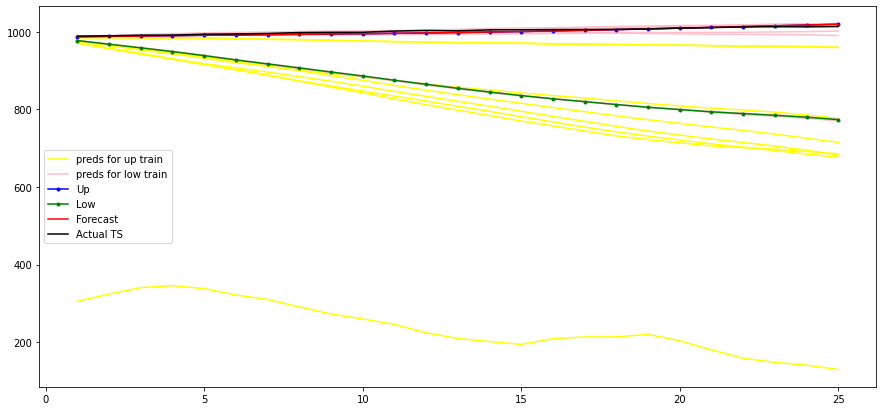

In [23]:
conf_int_plotting(up_predictions = x['up_predictions'],
                  low_predictions = x['low_predictions'],
                  regim='quantile',
                  plot_history = False,
                  plot_up_int = True,
                  plot_low_int = True,
                  plot_trend = False,
                  plot_forecast = True,
                  plot_upper_train = True,
                  plot_lower_train = True,
                  plot_ts_test = True)